# Seaborn Kernel Density Estimate

In [1]:
import seaborn as sns
import scipy.io as sio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
file = 'https://raw.githubusercontent.com/frankwwu/machine-learning-exercise/master/coursera-machine-learning-python/ex7/ex7data2.csv'
X = pd.read_csv(file, header = None)
X = X.reset_index().values[:, 1:3]

In [3]:
def find_closest_centroids(X, centroids):   
    m = X.shape[0]
    idx = np.zeros(m)
    for i in range(m):
        dist = np.sum(np.square(centroids - X[i, :]), axis = 1)
        idx[i] = np.argmin(dist)

    return idx

In [4]:
def compute_centroids(X, idx, K):       
    m, n = X.shape
    centroids = np.zeros((K, n))

    for k in range(K):
        x = X[idx == k]
        centroids[k, :] = np.mean(x, axis = 0)

    return centroids

In [5]:
def run_k_means(X, initial_centroids, max_iters, plot_progress=False):   
    K = initial_centroids.shape[0]
    centroids = initial_centroids    
    idx = np.zeros(X.shape[0])

    for i in range(max_iters):
        print('K-Means iteration {}/{}'.format(i + 1, max_iters))
        idx = find_closest_centroids(X, centroids)       
        centroids = compute_centroids(X, idx, K)

    return centroids, idx

In [6]:
# Initialize centroids
K = 3
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])
idx = find_closest_centroids(X, initial_centroids)
centroids = compute_centroids(X, idx, K)

In [7]:
# Settings for running K-Means
max_iters = 10

# Run K-Means algorithm
centroids, idx = run_k_means(X, initial_centroids, max_iters, True)
print('K-Means is done.')

K-Means iteration 1/10
K-Means iteration 2/10
K-Means iteration 3/10
K-Means iteration 4/10
K-Means iteration 5/10
K-Means iteration 6/10
K-Means iteration 7/10
K-Means iteration 8/10
K-Means iteration 9/10
K-Means iteration 10/10
K-Means is done.


In [8]:
a = np.column_stack((X, idx))
df = pd.DataFrame.from_records(a)
df.columns = ['X', 'Y', 'K']
df['Cluster'] = df['K'].astype(int)
df['Cluster'] = df['Cluster'].astype(str)

Text(3.7, 2.9, '2')

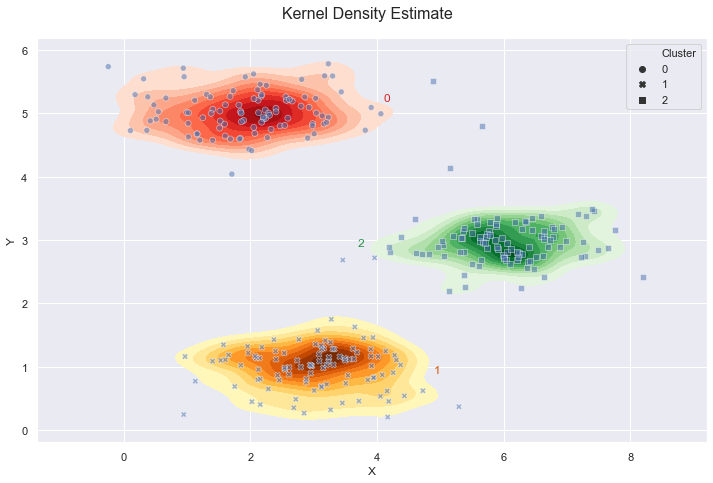

In [11]:
sns.set(style="darkgrid")

# Subset the dataset by K
k0 = df.query("K == '0'")
k1 = df.query("K == '1'")
k2 = df.query("K == '2'")

# Plot KDE
f, ax = plt.subplots(figsize=(12, 12))
ax.set_aspect("equal")

# Draw the density plot
ax = sns.kdeplot(k0.X, k0.Y, cmap = 'Reds', shade = True, shade_lowest = False)
ax = sns.kdeplot(k1.X, k1.Y, cmap = 'YlOrBr', shade = True, shade_lowest = False)
ax = sns.kdeplot(k2.X, k2.Y, cmap = 'Greens', shade = True, shade_lowest = False)
ax = sns.scatterplot(data = df, x = 'X', y = 'Y', style = 'Cluster', alpha = 0.5)

# Add labels to the plot
red = sns.color_palette('Reds')[-2]
yellow = sns.color_palette('YlOrBr')[-2]
green = sns.color_palette('Greens')[-2]
ax.text(2.5, 6.5, 'Kernel Density Estimate', size = 16)
ax.text(4.1, 5.2, '0', size = 12, color = red)
ax.text(4.9, 0.9, '1', size = 12, color = yellow)
ax.text(3.7, 2.9, '2', size = 12, color = green)